# Developing a neural network for Fashion MNIST dataset

In [1]:
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),
                              (0.5,)),])
trainset = datasets.FashionMNIST('FashionMNIST_data', download = True,
                                transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 100, shuffle=True)

In [2]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


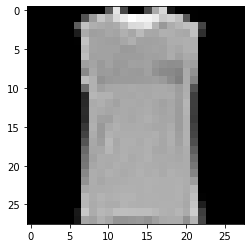

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [4]:
from torch import nn
from torch import optim
model = nn.Sequential(nn.Linear(784, 156),
                     nn.ReLU(),
                     nn.Linear(156, 78),
                     nn.ReLU(),
                     nn.Linear(78, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
# Adam optimizer uses momentum to speed up fitting process, and also
# adjust learning rate for each of individual parameter in model.

epochs = 10
for e in range(epochs):
    current_epoch_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        current_epoch_loss += loss.item()
    else:
        print("Training Loss in epooc",e,":",current_epoch_loss)
        
        
        

Training Loss in epooc 0 : 328.5106117427349
Training Loss in epooc 1 : 253.8107836395502
Training Loss in epooc 2 : 242.11363898217678
Training Loss in epooc 3 : 228.90288399159908
Training Loss in epooc 4 : 221.5439964234829
Training Loss in epooc 5 : 221.36711908876896
Training Loss in epooc 6 : 215.37593264132738
Training Loss in epooc 7 : 209.10553628206253
Training Loss in epooc 8 : 212.24082124233246
Training Loss in epooc 9 : 203.4146065413952


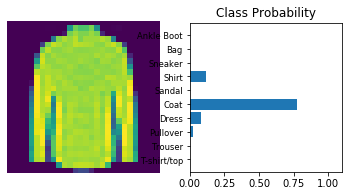

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

import torch.nn.functional as F
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

# Turning off gradients to spped up this part
with torch.no_grad():
    logits = model.forward(img)
    
# output of this network are logits, need to take softmax for probabilities
prob = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), prob, 'Fashion')

# Validation

In [6]:
# Using a trained network for making predictions is called inference.
# Neural networks have a tendency to perform well on training data and
# aren't able to generalize to unseen data, ie overfitting. 
# To test for overfitting while training, we measure performance on data 
# not in training set, called Validation set.
# We avaoid overfitting through regularization such as dropout while 
# monitoring validation performance during training.

from torchvision import datasets, transforms
import torch

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),
                              (0.5,)),])
trainset = datasets.FashionMNIST('~/. pytorch/F_MNIST_data/', download = True, train=True,
                                transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 100, shuffle=True)

testset = datasets.FashionMNIST('~/. pytorch/F_MNIST_data/', download = True, train=False,
                                transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 100, shuffle=True)

In [24]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 125)
        self.fc3 = nn.Linear(125, 70)
        self.fc4 = nn.Linear(70, 10)
        
        # adding dropout with 0.2 probability to reduce overfitting
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        
        # flattening input tensor
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # in output no dropout
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [25]:
model = Classifier()
images, labels = next(iter(testloader))

prob = torch.exp(model(images))

print(prob.shape)
# print(testloader)

torch.Size([100, 10])


In [26]:
top_p, top_class = prob.topk(1, dim=1)
# topk gives top k values in prob, here k=1
print(top_class[:10,:])

tensor([[4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4]])


In [27]:
print(top_class.shape, labels.shape)
# so to equality to work, top_class and labels must have same shape.
equals = top_class == labels.view(*top_class.shape)
print(equals.shape)
# equals

torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1])


In [28]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 1.9999999552965164%


In [29]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0
train_losses, test_losses = [], []

# During training we want to use dropout to prevent overfitting, but 
# during inference we want to use entire network. So we turnoff dropout
# during validation.

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        prob = model(images)
        loss = criterion(prob, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        # validation pass
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            # set model to evaluation mode(to deactivate dropout)
            model.eval()
            for images, labels in testloader:
                log_prob = model(images)
                prob = torch.exp(log_prob)
                test_loss+=criterion(log_prob, labels)
                
                top_p, top_class = prob.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
                                 
        print("Epoch: {}/{}.. ".format(e+1, epochs),
             "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
             "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
             "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
        
        # set model back to train mode(to activate dropout)
        model.train()

Epoch: 1/30..  Training Loss: 0.604..  Test Loss: 0.460..  Test Accuracy: 0.838
Epoch: 2/30..  Training Loss: 0.458..  Test Loss: 0.411..  Test Accuracy: 0.853
Epoch: 3/30..  Training Loss: 0.433..  Test Loss: 0.408..  Test Accuracy: 0.859
Epoch: 4/30..  Training Loss: 0.411..  Test Loss: 0.395..  Test Accuracy: 0.864
Epoch: 5/30..  Training Loss: 0.397..  Test Loss: 0.385..  Test Accuracy: 0.862
Epoch: 6/30..  Training Loss: 0.388..  Test Loss: 0.382..  Test Accuracy: 0.866
Epoch: 7/30..  Training Loss: 0.379..  Test Loss: 0.379..  Test Accuracy: 0.865
Epoch: 8/30..  Training Loss: 0.373..  Test Loss: 0.361..  Test Accuracy: 0.871
Epoch: 9/30..  Training Loss: 0.370..  Test Loss: 0.376..  Test Accuracy: 0.867
Epoch: 10/30..  Training Loss: 0.367..  Test Loss: 0.362..  Test Accuracy: 0.875
Epoch: 11/30..  Training Loss: 0.358..  Test Loss: 0.381..  Test Accuracy: 0.868
Epoch: 12/30..  Training Loss: 0.359..  Test Loss: 0.372..  Test Accuracy: 0.873
Epoch: 13/30..  Training Loss: 0.350.

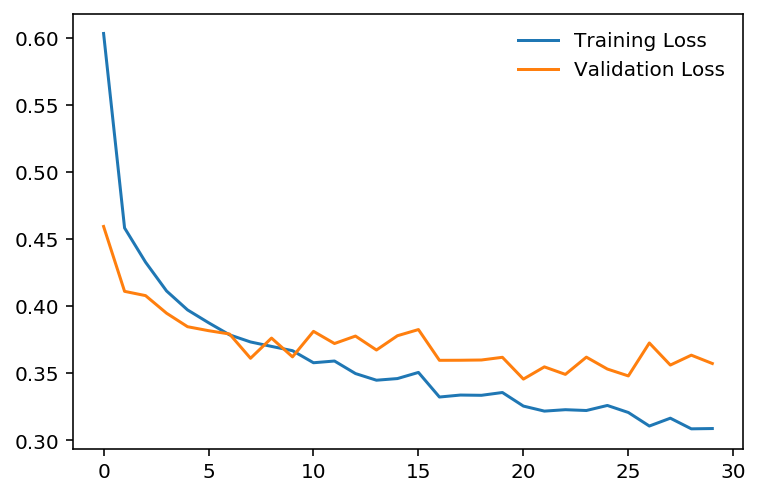

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.legend(frameon=False)


# As the epoochs increase training loss decreases and validation loss
# increases, ie model is overfitting. To prevent it
# Early stopping or
# Dropout: we randomly drop input units, this forces the model to 
# share information between weights, increasing its ability to generalize.


# Saving and Loading networks

In [31]:
print("Model: \n\n",model,"\n")
print("The state dict keys: \n\n", model.state_dict().keys())

Model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=125, bias=True)
  (fc3): Linear(in_features=125, out_features=70, bias=True)
  (fc4): Linear(in_features=70, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [32]:
torch.save(model.state_dict(), 'model_checkpoint.pth')

In [33]:
state_dict = torch.load('model_checkpoint.pth')
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [34]:
model.load_state_dict(state_dict)

<All keys matched successfully>